# HydroSOS - Correlations between hindcasts and observations

In this notebook, we explore the Persistance and Hydrological Analogue method

## Import the python libraries

In [1]:
%reset -f

In [2]:
# Importing the libraries
import os
import pandas as pd
import seaborn as sns
import numpy as np
import calendar
import datetime
import matplotlib.pyplot as plt
from operator import itemgetter

from scipy import stats
plt.style.use('classic')
%matplotlib inline

from IPython.display import HTML

sns.set()

In [3]:
# install a conda package in the current Jupyter kernel
#import sys
#!conda install --yes --prefix {sys.prefix} missingno

In [4]:
import missingno

### We create function for percentile definition

In [5]:
# Quantile Function Definitions
def q1(x):
    return x.quantile(0.28)

def q2(x):
    return x.median()

def q3(x):
    return x.quantile(0.72)

def q5(x):
    return x.quantile(0.05)

def q95(x):
    return x.quantile(0.95)

def q87(x):
    return x.quantile(0.87)

def q13(x):
    return x.quantile(0.13)


## Import Data 

In [15]:
DANA = 6
FORECAST_LENGTH = 1

filename = 'santalucia_caudales_HINDCAST_ANALOGUE_abr2023' + '_FL_' + str(FORECAST_LENGTH) + '_DANA_' + str(DANA)
OBSERVED_AND_HIND_FORECAST_ANALOGUE_SL_D6_F1 = pd.read_csv('../data/' + filename + '.csv',parse_dates=['DATE'],na_values="")

In [16]:
DANA = 6
FORECAST_LENGTH = 3

filename = 'santalucia_caudales_HINDCAST_ANALOGUE_abr2023' + '_FL_' + str(FORECAST_LENGTH) + '_DANA_' + str(DANA)
OBSERVED_AND_HIND_FORECAST_ANALOGUE_SL_D6_F3 = pd.read_csv('../data/' + filename + '.csv',parse_dates=['DATE'],na_values="")

In [17]:
DANA = 9
FORECAST_LENGTH = 1

filename = 'santalucia_caudales_HINDCAST_ANALOGUE_abr2023' + '_FL_' + str(FORECAST_LENGTH) + '_DANA_' + str(DANA)
OBSERVED_AND_HIND_FORECAST_ANALOGUE_SL_D9_F1 = pd.read_csv('../data/' + filename + '.csv',parse_dates=['DATE'],na_values="")

In [18]:
DANA = 9
FORECAST_LENGTH = 3

filename = 'santalucia_caudales_HINDCAST_ANALOGUE_abr2023' + '_FL_' + str(FORECAST_LENGTH) + '_DANA_' + str(DANA)
OBSERVED_AND_HIND_FORECAST_ANALOGUE_SL_D9_F3 = pd.read_csv('../data/' + filename + '.csv',parse_dates=['DATE'],na_values="")

In [19]:
OBSERVED_AND_HIND_FORECAST_ANALOGUE_SL_D9_F3

,Month,Year,Anomaly_Qlog,DATE,FORECAST
0,1,1980,-2.123750,1980-01-01,NaN
1,2,1980,0.316909,1980-02-01,NaN
2,3,1980,1.120851,1980-03-01,NaN
3,4,1980,1.200881,1980-04-01,NaN
4,5,1980,1.373637,1980-05-01,NaN
...,...,...,...,...,...
511,8,2022,-1.282212,2022-08-01,0.345455
512,9,2022,-1.975643,2022-09-01,-0.258504
513,10,2022,-1.762722,2022-10-01,-0.283818
514,11,2022,-1.097971,2022-11-01,-0.222248


In [31]:
filename_1 = 'santalucia_caudales_HINDCAST_PERSISTENCE_abr2023' + '_FL_1_2_3_6' 
RESCALE_FORECAST_PERSISTENCE = pd.read_csv('../data/' + filename_1 + '.csv',parse_dates=['DATE'],na_values="")

In [32]:
RESCALE_FORECAST_PERSISTENCE

,Month,Year,Anomaly_Qlog,DATE,1_monthFcst,2_monthFcst,3_monthFcst,6_monthFcst,mean_A_H,std_A_H,mean,std,low,medium,high
0,1,1980,-2.123750,1980-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1980,0.316909,1980-02-01,-2.340416,NaN,NaN,NaN,0.077213,0.940415,2.960569,1.285232,2.103205,2.580642,3.238421
2,3,1980,1.120851,1980-03-01,0.299823,-2.340416,NaN,NaN,0.017155,0.999771,3.109804,1.177222,2.340484,2.653676,3.622124
3,4,1980,1.200881,1980-04-01,1.149825,0.299823,-2.340416,NaN,0.011027,0.965211,3.423551,1.388412,2.479889,3.023710,4.245612
4,5,1980,1.373637,1980-05-01,1.242450,1.149825,0.299823,NaN,0.012194,0.956728,3.781959,1.272669,2.789972,3.752282,4.707521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,8,2022,-1.282212,2022-08-01,0.202581,-1.396766,-0.183177,-0.284719,-0.005062,0.999487,4.565461,0.984210,4.124829,4.541471,5.161298
512,9,2022,-1.975643,2022-09-01,-1.349889,0.202581,-1.396766,-0.449192,0.035617,0.976249,4.637940,0.913679,4.095474,4.872367,5.124635
513,10,2022,-1.762722,2022-10-01,-2.154083,-1.349889,0.202581,-0.694677,0.054879,0.942638,4.178918,1.212708,3.386712,3.981831,5.110990
514,11,2022,-1.097971,2022-11-01,-1.893876,-2.154083,-1.349889,-0.183177,0.047641,0.955904,3.849523,1.208961,2.983599,3.834529,4.652311


## Pearson correlation 

In [24]:
corr_prono_all_SL_D6_F1 = []

for m in range(1,13):
    
    nans_month_SL_D6_F1 = np.logical_or(np.isnan(OBSERVED_AND_HIND_FORECAST_ANALOGUE_SL_D6_F1.query('Month==@m')['Anomaly_Qlog'].values),np.isnan(OBSERVED_AND_HIND_FORECAST_ANALOGUE_SL_D6_F1.query('Month==@m')['FORECAST'].values))
    corr_prono_month_SL_D6_F1 = stats.pearsonr(OBSERVED_AND_HIND_FORECAST_ANALOGUE_SL_D6_F1.query('Month==@m')['Anomaly_Qlog'].values[~nans_month_SL_D6_F1], OBSERVED_AND_HIND_FORECAST_ANALOGUE_SL_D6_F1.query('Month==@m')['FORECAST'].values[~nans_month_SL_D6_F1], alternative = 'greater')
    
    corr_prono_all_SL_D6_F1.append(corr_prono_month_SL_D6_F1)

    
Pearson_R_val_SL_D6_F1 = []
Pearson_p_val_SL_D6_F1 = []
Pearson_ci_val_SL_D6_F1 = []
# corr_prono_all[0].confidence_interval().confidence_interval()

for sublist in corr_prono_all_SL_D6_F1:
    Pearson_R_val_SL_D6_F1.append(sublist[0])
    Pearson_p_val_SL_D6_F1.append(sublist[1])
    Pearson_ci_val_SL_D6_F1.append([round(sublist.confidence_interval().low,4), round(sublist.confidence_interval().high,4)])

In [25]:
corr_prono_all_SL_D6_F3 = []

for m in range(1,13):
    
    nans_month_SL_D6_F3 = np.logical_or(np.isnan(OBSERVED_AND_HIND_FORECAST_ANALOGUE_SL_D6_F3.query('Month==@m')['Anomaly_Qlog'].values),np.isnan(OBSERVED_AND_HIND_FORECAST_ANALOGUE_SL_D6_F3.query('Month==@m')['FORECAST'].values))
    corr_prono_month_SL_D6_F3 = stats.pearsonr(OBSERVED_AND_HIND_FORECAST_ANALOGUE_SL_D6_F3.query('Month==@m')['Anomaly_Qlog'].values[~nans_month_SL_D6_F3], OBSERVED_AND_HIND_FORECAST_ANALOGUE_SL_D6_F3.query('Month==@m')['FORECAST'].values[~nans_month_SL_D6_F3], alternative = 'greater')
    
    corr_prono_all_SL_D6_F3.append(corr_prono_month_SL_D6_F3)

    
Pearson_R_val_SL_D6_F3 = []
Pearson_p_val_SL_D6_F3 = []
Pearson_ci_val_SL_D6_F3 = []
# corr_prono_all[0].confidence_interval().confidence_interval()

for sublist in corr_prono_all_SL_D6_F3:
    Pearson_R_val_SL_D6_F3.append(sublist[0])
    Pearson_p_val_SL_D6_F3.append(sublist[1])
    Pearson_ci_val_SL_D6_F3.append([round(sublist.confidence_interval().low,4), round(sublist.confidence_interval().high,4)])

In [26]:
corr_prono_all_SL_D9_F1 = []

for m in range(1,13):
    
    nans_month_SL_D9_F1 = np.logical_or(np.isnan(OBSERVED_AND_HIND_FORECAST_ANALOGUE_SL_D9_F1.query('Month==@m')['Anomaly_Qlog'].values),np.isnan(OBSERVED_AND_HIND_FORECAST_ANALOGUE_SL_D9_F1.query('Month==@m')['FORECAST'].values))
    corr_prono_month_SL_D9_F1 = stats.pearsonr(OBSERVED_AND_HIND_FORECAST_ANALOGUE_SL_D9_F1.query('Month==@m')['Anomaly_Qlog'].values[~nans_month_SL_D9_F1], OBSERVED_AND_HIND_FORECAST_ANALOGUE_SL_D9_F1.query('Month==@m')['FORECAST'].values[~nans_month_SL_D9_F1], alternative = 'greater')
    
    corr_prono_all_SL_D9_F1.append(corr_prono_month_SL_D9_F1)

    
Pearson_R_val_SL_D9_F1 = []
Pearson_p_val_SL_D9_F1 = []
Pearson_ci_val_SL_D9_F1 = []
# corr_prono_all[0].confidence_interval().confidence_interval()

for sublist in corr_prono_all_SL_D9_F1:
    Pearson_R_val_SL_D9_F1.append(sublist[0])
    Pearson_p_val_SL_D9_F1.append(sublist[1])
    Pearson_ci_val_SL_D9_F1.append([round(sublist.confidence_interval().low,4), round(sublist.confidence_interval().high,4)])

In [27]:
corr_prono_all_SL_D9_F3 = []

for m in range(1,13):
    
    nans_month_SL_D9_F3 = np.logical_or(np.isnan(OBSERVED_AND_HIND_FORECAST_ANALOGUE_SL_D9_F3.query('Month==@m')['Anomaly_Qlog'].values),np.isnan(OBSERVED_AND_HIND_FORECAST_ANALOGUE_SL_D9_F3.query('Month==@m')['FORECAST'].values))
    corr_prono_month_SL_D9_F3 = stats.pearsonr(OBSERVED_AND_HIND_FORECAST_ANALOGUE_SL_D9_F3.query('Month==@m')['Anomaly_Qlog'].values[~nans_month_SL_D9_F3], OBSERVED_AND_HIND_FORECAST_ANALOGUE_SL_D9_F3.query('Month==@m')['FORECAST'].values[~nans_month_SL_D9_F3], alternative = 'greater')
    
    corr_prono_all_SL_D9_F3.append(corr_prono_month_SL_D9_F3)

    
Pearson_R_val_SL_D9_F3 = []
Pearson_p_val_SL_D9_F3 = []
Pearson_ci_val_SL_D9_F3 = []
# corr_prono_all[0].confidence_interval().confidence_interval()

for sublist in corr_prono_all_SL_D9_F3:
    Pearson_R_val_SL_D9_F3.append(sublist[0])
    Pearson_p_val_SL_D9_F3.append(sublist[1])
    Pearson_ci_val_SL_D9_F3.append([round(sublist.confidence_interval().low,4), round(sublist.confidence_interval().high,4)])

In [44]:
corr_prono_all_SL_PERS_F1 = []

for m in range(1,13):
    
    nans_month_SL_PERS_F1 = np.logical_or(np.isnan(RESCALE_FORECAST_PERSISTENCE.query('Month==@m')['Anomaly_Qlog'].values),np.isnan(RESCALE_FORECAST_PERSISTENCE.query('Month==@m')['1_monthFcst'].values))
    corr_prono_month_SL_PERS_F1 = stats.pearsonr(RESCALE_FORECAST_PERSISTENCE.query('Month==@m')['Anomaly_Qlog'].values[~nans_month_SL_PERS_F1], RESCALE_FORECAST_PERSISTENCE.query('Month==@m')['1_monthFcst'].values[~nans_month_SL_PERS_F1], alternative = 'greater')
    
    corr_prono_all_SL_PERS_F1.append(corr_prono_month_SL_PERS_F1)

    
Pearson_R_val_SL_PERS_F1 = []
Pearson_p_val_SL_PERS_F1 = []
Pearson_ci_val_SL_PERS_F1 = []
# corr_prono_all[0].confidence_interval().confidence_interval()

for sublist in corr_prono_all_SL_PERS_F1:
    Pearson_R_val_SL_PERS_F1.append(sublist[0])
    Pearson_p_val_SL_PERS_F1.append(sublist[1])
    Pearson_ci_val_SL_PERS_F1.append([round(sublist.confidence_interval().low,4), round(sublist.confidence_interval().high,4)])

In [45]:
corr_prono_all_SL_PERS_F3 = []

for m in range(1,13):
    
    nans_month_SL_PERS_F3 = np.logical_or(np.isnan(RESCALE_FORECAST_PERSISTENCE.query('Month==@m')['Anomaly_Qlog'].values),np.isnan(RESCALE_FORECAST_PERSISTENCE.query('Month==@m')['3_monthFcst'].values))
    corr_prono_month_SL_PERS_F3 = stats.pearsonr(RESCALE_FORECAST_PERSISTENCE.query('Month==@m')['Anomaly_Qlog'].values[~nans_month_SL_PERS_F3], RESCALE_FORECAST_PERSISTENCE.query('Month==@m')['3_monthFcst'].values[~nans_month_SL_PERS_F3], alternative = 'greater')
    
    corr_prono_all_SL_PERS_F3.append(corr_prono_month_SL_PERS_F3)

    
Pearson_R_val_SL_PERS_F3 = []
Pearson_p_val_SL_PERS_F3 = []
Pearson_ci_val_SL_PERS_F3 = []
# corr_prono_all[0].confidence_interval().confidence_interval()

for sublist in corr_prono_all_SL_PERS_F3:
    Pearson_R_val_SL_PERS_F3.append(sublist[0])
    Pearson_p_val_SL_PERS_F3.append(sublist[1])
    Pearson_ci_val_SL_PERS_F3.append([round(sublist.confidence_interval().low,4), round(sublist.confidence_interval().high,4)])

## Plots

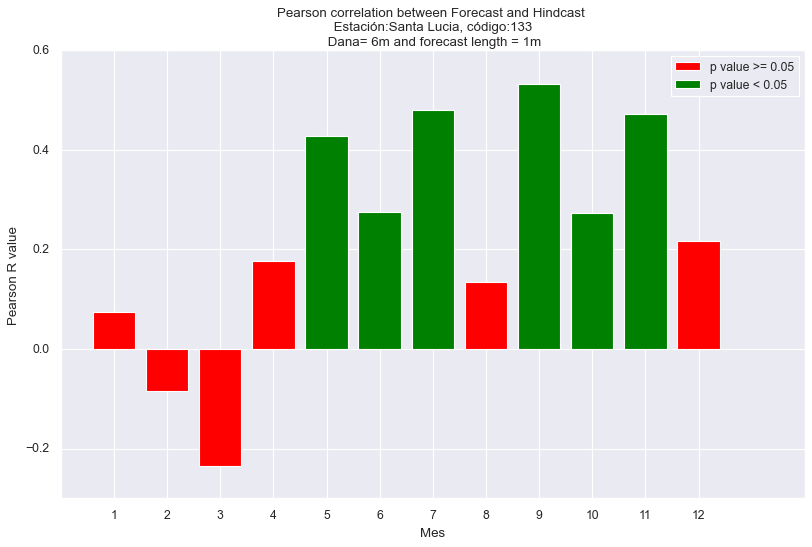

In [56]:
##the actual graph:
estacion = 'Santa Lucia'
cod_estacion = '133'

fig, ax = plt.subplots(figsize = (12, 7))

idx = np.arange(1,13)

ax.bar(idx, Pearson_R_val_SL_D6_F1,color='red')
ax.bar(idx[np.array(Pearson_p_val_SL_D6_F1)< 0.05], list(itemgetter(*np.array(idx[np.array(Pearson_p_val_SL_D6_F1)< 0.05]-1))(Pearson_R_val_SL_D6_F1)),color='green')
ax.set_xticks(idx)
ax.set_xticklabels(idx, rotation=0)
ax.set_xlabel('Mes',fontsize=12)
ax.set_ylabel('Pearson R value',fontsize=12)
#ax.set_title(f'Pearson correlation between Forecast and Hindcast \n Estación:{estacion}, código:{cod_estacion} \n Dana={DANA}m and forecast length = {FORECAST_LENGTH}m',fontsize=12)
ax.set_title(f'Pearson correlation between Forecast and Hindcast \n Estación:{estacion}, código:{cod_estacion} \n Dana= 6m and forecast length = 1m',fontsize=12)
ax.legend(['p value >= 0.05','p value < 0.05'])

#plt.tight_layout()
#plt.savefig('Caudales_marzo_barplot_DURAZ.png', dpi=1000, bbox_inches='tight')
plt.show()

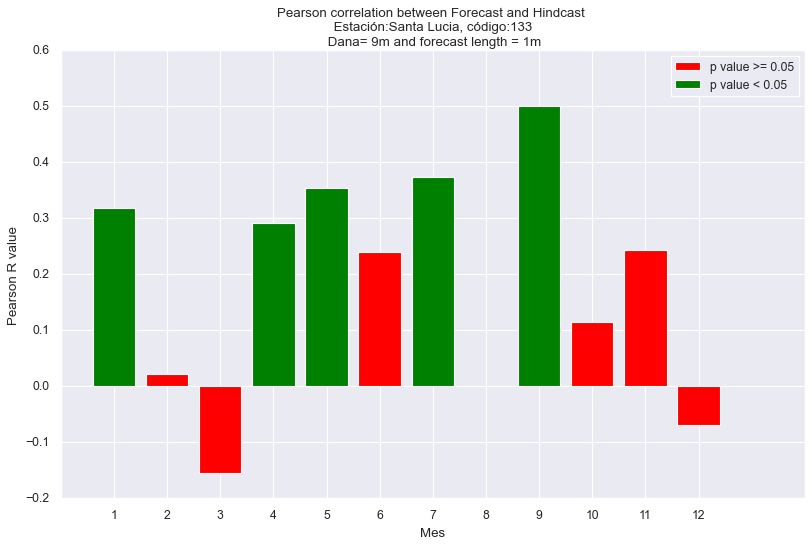

In [59]:
##the actual graph:
estacion = 'Santa Lucia'
cod_estacion = '133'

fig, ax = plt.subplots(figsize = (12, 7))

idx = np.arange(1,13)

ax.bar(idx, Pearson_R_val_SL_D9_F1, color='red')
ax.bar(idx[np.array(Pearson_p_val_SL_D9_F1)< 0.05], list(itemgetter(*np.array(idx[np.array(Pearson_p_val_SL_D9_F1)< 0.05]-1))(Pearson_R_val_SL_D9_F1)),color='green')
ax.set_xticks(idx)
ax.set_xticklabels(idx, rotation=0)
ax.set_xlabel('Mes',fontsize=12)
ax.set_ylabel('Pearson R value',fontsize=12)
#ax.set_title(f'Pearson correlation between Forecast and Hindcast \n Estación:{estacion}, código:{cod_estacion} \n Dana={DANA}m and forecast length = {FORECAST_LENGTH}m',fontsize=12)
ax.set_title(f'Pearson correlation between Forecast and Hindcast \n Estación:{estacion}, código:{cod_estacion} \n Dana= 9m and forecast length = 1m',fontsize=12)
ax.legend(['p value >= 0.05','p value < 0.05'])

#plt.tight_layout()
#plt.savefig('Caudales_marzo_barplot_DURAZ.png', dpi=1000, bbox_inches='tight')
plt.show()

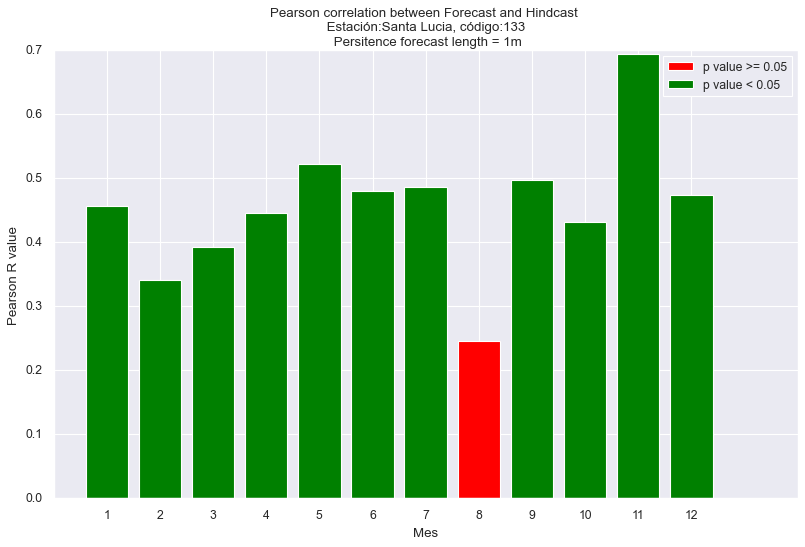

In [60]:
##the actual graph:
estacion = 'Santa Lucia'
cod_estacion = '133'

fig, ax = plt.subplots(figsize = (12, 7))

idx = np.arange(1,13)

ax.bar(idx, Pearson_R_val_SL_PERS_F1, color='red')
ax.bar(idx[np.array(Pearson_p_val_SL_PERS_F1)< 0.05], list(itemgetter(*np.array(idx[np.array(Pearson_p_val_SL_PERS_F1)< 0.05]-1))(Pearson_R_val_SL_PERS_F1)),color='green')
ax.set_xticks(idx)
ax.set_xticklabels(idx, rotation=0)
ax.set_xlabel('Mes',fontsize=12)
ax.set_ylabel('Pearson R value',fontsize=12)
#ax.set_title(f'Pearson correlation between Forecast and Hindcast \n Estación:{estacion}, código:{cod_estacion} \n Dana={DANA}m and forecast length = {FORECAST_LENGTH}m',fontsize=12)
ax.set_title(f'Pearson correlation between Forecast and Hindcast \n Estación:{estacion}, código:{cod_estacion} \n Persitence forecast length = 1m',fontsize=12)
ax.legend(['p value >= 0.05','p value < 0.05'])

#plt.tight_layout()
#plt.savefig('Caudales_marzo_barplot_DURAZ.png', dpi=1000, bbox_inches='tight')
plt.show()

# 3m Forecast

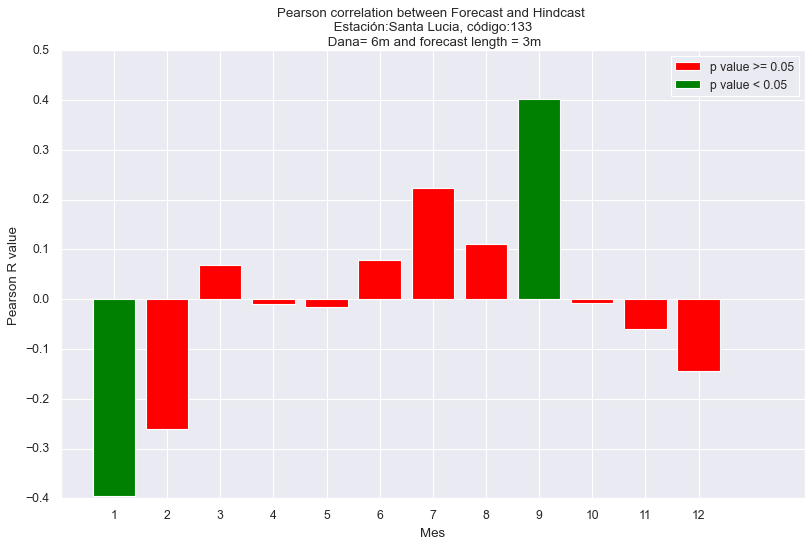

In [61]:
##the actual graph:
estacion = 'Santa Lucia'
cod_estacion = '133'

fig, ax = plt.subplots(figsize = (12, 7))

idx = np.arange(1,13)

ax.bar(idx, Pearson_R_val_SL_D6_F3, color='red')
ax.bar(idx[np.array(Pearson_p_val_SL_D6_F3)< 0.05], list(itemgetter(*np.array(idx[np.array(Pearson_p_val_SL_D6_F3)< 0.05]-1))(Pearson_R_val_SL_D6_F3)),color='green')
ax.set_xticks(idx)
ax.set_xticklabels(idx, rotation=0)
ax.set_xlabel('Mes',fontsize=12)
ax.set_ylabel('Pearson R value',fontsize=12)
#ax.set_title(f'Pearson correlation between Forecast and Hindcast \n Estación:{estacion}, código:{cod_estacion} \n Dana={DANA}m and forecast length = {FORECAST_LENGTH}m',fontsize=12)
ax.set_title(f'Pearson correlation between Forecast and Hindcast \n Estación:{estacion}, código:{cod_estacion} \n Dana= 6m and forecast length = 3m',fontsize=12)
ax.legend(['p value >= 0.05','p value < 0.05'])

#plt.tight_layout()
#plt.savefig('Caudales_marzo_barplot_DURAZ.png', dpi=1000, bbox_inches='tight')
plt.show()

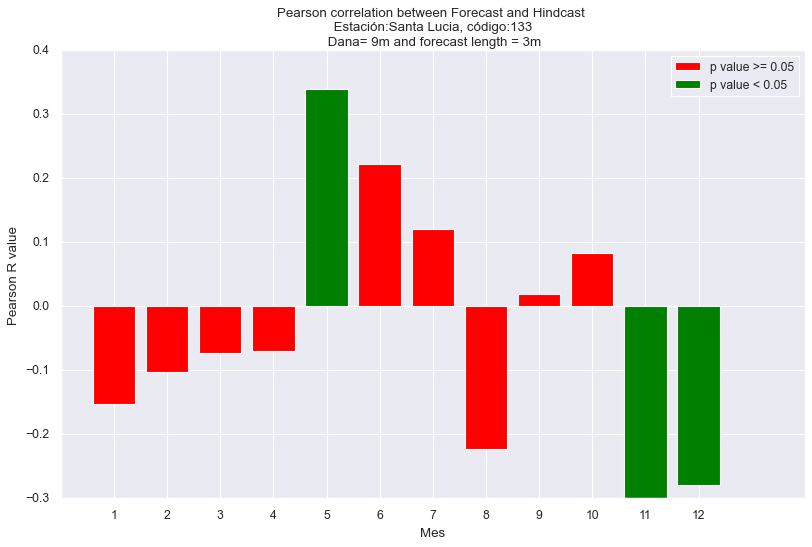

In [62]:
##the actual graph:
estacion = 'Santa Lucia'
cod_estacion = '133'

fig, ax = plt.subplots(figsize = (12, 7))

idx = np.arange(1,13)

ax.bar(idx, Pearson_R_val_SL_D9_F3,color='red')
ax.bar(idx[np.array(Pearson_p_val_SL_D9_F3)< 0.05], list(itemgetter(*np.array(idx[np.array(Pearson_p_val_SL_D9_F3)< 0.05]-1))(Pearson_R_val_SL_D9_F3)),color='green')
ax.set_xticks(idx)
ax.set_xticklabels(idx, rotation=0)
ax.set_xlabel('Mes',fontsize=12)
ax.set_ylabel('Pearson R value',fontsize=12)
#ax.set_title(f'Pearson correlation between Forecast and Hindcast \n Estación:{estacion}, código:{cod_estacion} \n Dana={DANA}m and forecast length = {FORECAST_LENGTH}m',fontsize=12)
ax.set_title(f'Pearson correlation between Forecast and Hindcast \n Estación:{estacion}, código:{cod_estacion} \n Dana= 9m and forecast length = 3m',fontsize=12)
ax.legend(['p value >= 0.05','p value < 0.05'])

#plt.tight_layout()
#plt.savefig('Caudales_marzo_barplot_DURAZ.png', dpi=1000, bbox_inches='tight')
plt.show()

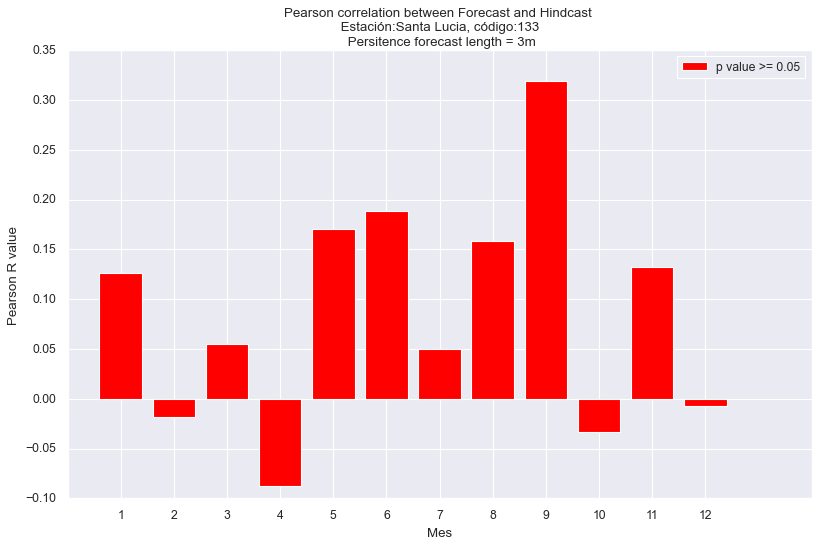

In [63]:
##the actual graph:
estacion = 'Santa Lucia'
cod_estacion = '133'

fig, ax = plt.subplots(figsize = (12, 7))

idx = np.arange(1,13)

ax.bar(idx, Pearson_R_val_SL_PERS_F3,color='red')
#ax.bar(idx[np.array(Pearson_p_val_SL_PERS_F3)< 0.05], list(itemgetter(*np.array(idx[np.array(Pearson_p_val_SL_PERS_F3)< 0.05]-1))(Pearson_R_val_SL_PERS_F3)),color='red')
ax.set_xticks(idx)
ax.set_xticklabels(idx, rotation=0)
ax.set_xlabel('Mes',fontsize=12)
ax.set_ylabel('Pearson R value',fontsize=12)
#ax.set_title(f'Pearson correlation between Forecast and Hindcast \n Estación:{estacion}, código:{cod_estacion} \n Dana={DANA}m and forecast length = {FORECAST_LENGTH}m',fontsize=12)
ax.set_title(f'Pearson correlation between Forecast and Hindcast \n Estación:{estacion}, código:{cod_estacion} \n Persitence forecast length = 3m',fontsize=12)
ax.legend(['p value >= 0.05','p value < 0.05'])

#plt.tight_layout()
#plt.savefig('Caudales_marzo_barplot_DURAZ.png', dpi=1000, bbox_inches='tight')
plt.show()

In [54]:
Pearson_p_val_SL_PERS_F3

[0.2313497522336179,
 0.45816856072600154,
 0.3769699904732276,
 0.30639934764573623,
 0.15644111250500048,
 0.12493362587670112,
 0.3837225605721,
 0.173921629600621,
 0.026891019663809534,
 0.4232078000285608,
 0.22119378152279287,
 0.4841478362650167]